In [1]:
import os
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Dataset, DataLoader, ConcatDataset

import torchvision
from src.data_loading import get_resnet_transforms
from PIL import Image

%matplotlib inline


train_dir = './data/train/train'
test_dir = './data/test/test'
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)
class CatDogDataset(Dataset):
    def __init__(self, file_list, dir, mode='train', transform = None):
        self.file_list = file_list
        self.dir = dir
        self.mode= mode
        self.transform = transform
        if self.mode == 'train':
            if 'dog' in self.file_list[0]:
                self.label = 1
            else:
                self.label = 0
            
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        img = Image.open(os.path.join(self.dir, self.file_list[idx]))
        if self.transform:
            img = self.transform(img)
        if self.mode == 'train':
            img = img.numpy()
            return img.astype('float32'), self.label
        else:
            img = img.numpy() 
            return img.astype('float32'), self.file_list[idx]
        
data_transform = get_resnet_transforms()

cat_files = [tf for tf in train_files if 'cat' in tf]
dog_files = [tf for tf in train_files if 'dog' in tf]

cats = CatDogDataset(cat_files, train_dir, transform = data_transform)
dogs = CatDogDataset(dog_files, train_dir, transform = data_transform)

catdogs = ConcatDataset([cats, dogs])
dataloader = DataLoader(catdogs, batch_size = 32, shuffle=True, num_workers=4)

/home/ray/miniconda3/envs/learning/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ray/miniconda3/envs/learning/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


deepeness:   0%|          | 0/997 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

[Epoch 1/3] Iteration 200 -> Train Loss: 8.5748, Accuracy: 0.594
[Epoch 1/3] Iteration 400 -> Train Loss: 2.5287, Accuracy: 0.531
[Epoch 1/3] Iteration 600 -> Train Loss: 1.3861, Accuracy: 0.594
[Epoch 2/3] Iteration 800 -> Train Loss: 1.0601, Accuracy: 0.812
[Epoch 2/3] Iteration 1000 -> Train Loss: 0.9714, Accuracy: 0.688
[Epoch 2/3] Iteration 1200 -> Train Loss: 0.6550, Accuracy: 0.656
[Epoch 2/3] Iteration 1400 -> Train Loss: 0.6043, Accuracy: 0.812
[Epoch 3/3] Iteration 1600 -> Train Loss: 0.5644, Accuracy: 0.750
[Epoch 3/3] Iteration 1800 -> Train Loss: 0.5023, Accuracy: 0.656
[Epoch 3/3] Iteration 2000 -> Train Loss: 0.5127, Accuracy: 0.812
[Epoch 3/3] Iteration 2200 -> Train Loss: 0.4966, Accuracy: 0.906
model CustomResNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (identity): Identity()


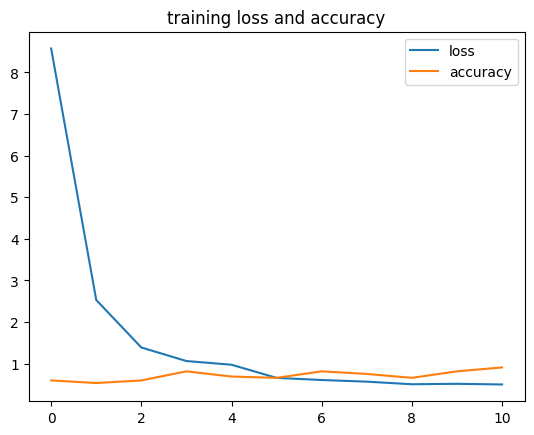

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

[Epoch 1/3] Iteration 2400 -> Train Loss: 0.6032, Accuracy: 0.688
[Epoch 1/3] Iteration 2600 -> Train Loss: 0.6463, Accuracy: 0.844
[Epoch 1/3] Iteration 2800 -> Train Loss: 0.5572, Accuracy: 0.719
[Epoch 1/3] Iteration 3000 -> Train Loss: 0.5549, Accuracy: 0.688
[Epoch 2/3] Iteration 3200 -> Train Loss: 0.5177, Accuracy: 0.781
[Epoch 2/3] Iteration 3400 -> Train Loss: 0.4803, Accuracy: 0.812
[Epoch 2/3] Iteration 3600 -> Train Loss: 0.4806, Accuracy: 0.719
[Epoch 2/3] Iteration 3800 -> Train Loss: 0.4826, Accuracy: 0.656
[Epoch 3/3] Iteration 4000 -> Train Loss: 0.4428, Accuracy: 0.844
[Epoch 3/3] Iteration 4200 -> Train Loss: 0.4361, Accuracy: 0.781
[Epoch 3/3] Iteration 4400 -> Train Loss: 0.4226, Accuracy: 0.625
[Epoch 3/3] Iteration 4600 -> Train Loss: 0.4247, Accuracy: 0.719
model CustomResNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

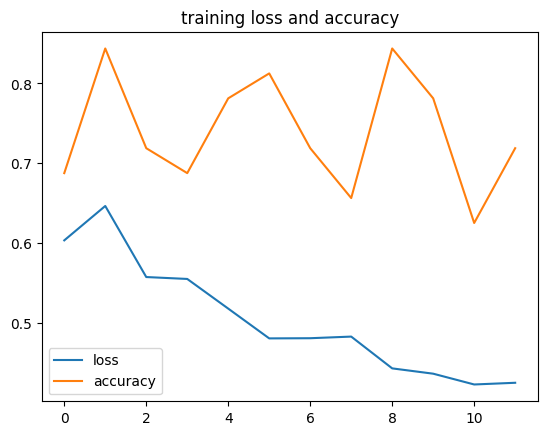

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

[Epoch 1/3] Iteration 4800 -> Train Loss: 3.4645, Accuracy: 0.719
[Epoch 1/3] Iteration 5000 -> Train Loss: 0.6125, Accuracy: 0.844
[Epoch 1/3] Iteration 5200 -> Train Loss: 0.4936, Accuracy: 0.812
[Epoch 1/3] Iteration 5400 -> Train Loss: 0.4238, Accuracy: 0.844
[Epoch 2/3] Iteration 5600 -> Train Loss: 0.3862, Accuracy: 0.812
[Epoch 2/3] Iteration 5800 -> Train Loss: 0.3500, Accuracy: 0.844
[Epoch 2/3] Iteration 6000 -> Train Loss: 0.3388, Accuracy: 0.688
[Epoch 2/3] Iteration 6200 -> Train Loss: 0.3387, Accuracy: 0.938
[Epoch 3/3] Iteration 6400 -> Train Loss: 0.2813, Accuracy: 0.875
[Epoch 3/3] Iteration 6600 -> Train Loss: 0.2890, Accuracy: 0.938
[Epoch 3/3] Iteration 6800 -> Train Loss: 0.2837, Accuracy: 0.812
[Epoch 3/3] Iteration 7000 -> Train Loss: 0.2787, Accuracy: 0.844
model CustomResNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

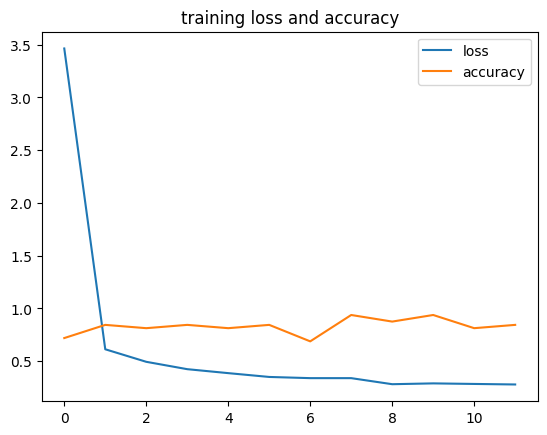

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

[Epoch 1/3] Iteration 7200 -> Train Loss: 0.7820, Accuracy: 0.812
[Epoch 1/3] Iteration 7400 -> Train Loss: 0.4576, Accuracy: 0.688
[Epoch 1/3] Iteration 7600 -> Train Loss: 0.4196, Accuracy: 0.906
[Epoch 1/3] Iteration 7800 -> Train Loss: 0.3540, Accuracy: 0.906
[Epoch 2/3] Iteration 8000 -> Train Loss: 0.3098, Accuracy: 0.938
[Epoch 2/3] Iteration 8200 -> Train Loss: 0.2970, Accuracy: 0.906
[Epoch 2/3] Iteration 8400 -> Train Loss: 0.2587, Accuracy: 0.906
[Epoch 2/3] Iteration 8600 -> Train Loss: 0.2420, Accuracy: 0.906
[Epoch 3/3] Iteration 8800 -> Train Loss: 0.1906, Accuracy: 0.906
[Epoch 3/3] Iteration 9000 -> Train Loss: 0.1951, Accuracy: 0.938
[Epoch 3/3] Iteration 9200 -> Train Loss: 0.1853, Accuracy: 0.906
model CustomResNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel

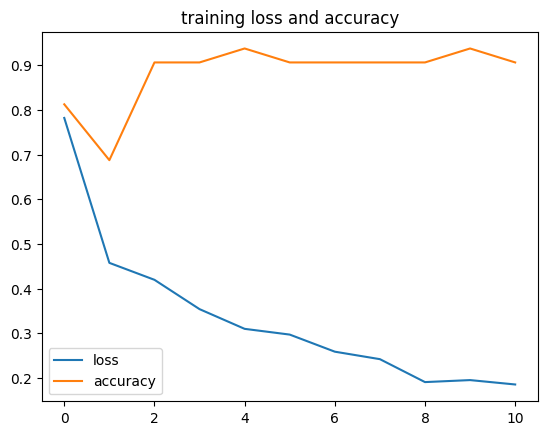

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

[Epoch 1/3] Iteration 9400 -> Train Loss: 0.0491, Accuracy: 0.719
[Epoch 1/3] Iteration 9600 -> Train Loss: 0.4031, Accuracy: 0.844
[Epoch 1/3] Iteration 9800 -> Train Loss: 0.3015, Accuracy: 0.812
[Epoch 1/3] Iteration 10000 -> Train Loss: 0.2538, Accuracy: 0.938
[Epoch 2/3] Iteration 10200 -> Train Loss: 0.2354, Accuracy: 0.906
[Epoch 2/3] Iteration 10400 -> Train Loss: 0.2169, Accuracy: 0.906
[Epoch 2/3] Iteration 10600 -> Train Loss: 0.1818, Accuracy: 0.875
[Epoch 2/3] Iteration 10800 -> Train Loss: 0.1769, Accuracy: 0.875
[Epoch 3/3] Iteration 11000 -> Train Loss: 0.1635, Accuracy: 0.906
[Epoch 3/3] Iteration 11200 -> Train Loss: 0.1381, Accuracy: 0.938
[Epoch 3/3] Iteration 11400 -> Train Loss: 0.1355, Accuracy: 0.969
[Epoch 3/3] Iteration 11600 -> Train Loss: 0.1466, Accuracy: 0.844
model CustomResNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

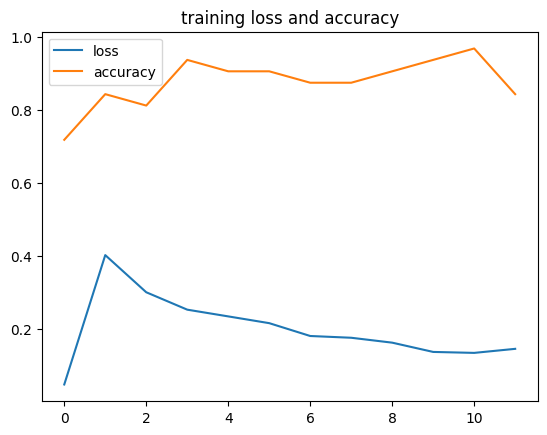

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

[Epoch 1/3] Iteration 11800 -> Train Loss: 0.9974, Accuracy: 0.656
[Epoch 1/3] Iteration 12000 -> Train Loss: 1.7526, Accuracy: 0.500
[Epoch 1/3] Iteration 12200 -> Train Loss: 0.7692, Accuracy: 0.750
[Epoch 1/3] Iteration 12400 -> Train Loss: 0.5877, Accuracy: 0.812
[Epoch 2/3] Iteration 12600 -> Train Loss: 0.5441, Accuracy: 0.781
[Epoch 2/3] Iteration 12800 -> Train Loss: 0.5128, Accuracy: 0.812
[Epoch 2/3] Iteration 13000 -> Train Loss: 0.4829, Accuracy: 0.688
[Epoch 2/3] Iteration 13200 -> Train Loss: 0.4600, Accuracy: 0.719
[Epoch 3/3] Iteration 13400 -> Train Loss: 0.4326, Accuracy: 0.844
[Epoch 3/3] Iteration 13600 -> Train Loss: 0.4323, Accuracy: 0.781
[Epoch 3/3] Iteration 13800 -> Train Loss: 0.4081, Accuracy: 0.750
[Epoch 3/3] Iteration 14000 -> Train Loss: 0.4054, Accuracy: 0.719
model CustomResNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, t

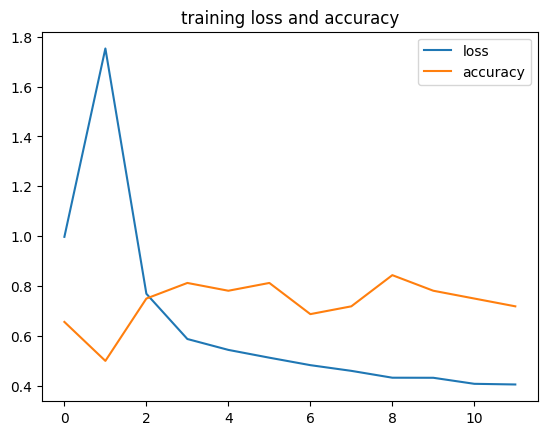

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

[Epoch 1/3] Iteration 14200 -> Train Loss: 0.3671, Accuracy: 0.750
[Epoch 1/3] Iteration 14400 -> Train Loss: 0.4701, Accuracy: 0.719
[Epoch 1/3] Iteration 14600 -> Train Loss: 0.3508, Accuracy: 0.812
[Epoch 1/3] Iteration 14800 -> Train Loss: 0.2638, Accuracy: 0.938
[Epoch 2/3] Iteration 15000 -> Train Loss: 0.2522, Accuracy: 0.812
[Epoch 2/3] Iteration 15200 -> Train Loss: 0.2155, Accuracy: 0.906
[Epoch 2/3] Iteration 15400 -> Train Loss: 0.1961, Accuracy: 0.938
[Epoch 2/3] Iteration 15600 -> Train Loss: 0.1992, Accuracy: 0.875
[Epoch 3/3] Iteration 15800 -> Train Loss: 0.1689, Accuracy: 0.938
[Epoch 3/3] Iteration 16000 -> Train Loss: 0.1696, Accuracy: 0.906
[Epoch 3/3] Iteration 16200 -> Train Loss: 0.1590, Accuracy: 0.969
[Epoch 3/3] Iteration 16400 -> Train Loss: 0.1593, Accuracy: 0.938
model CustomResNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, t

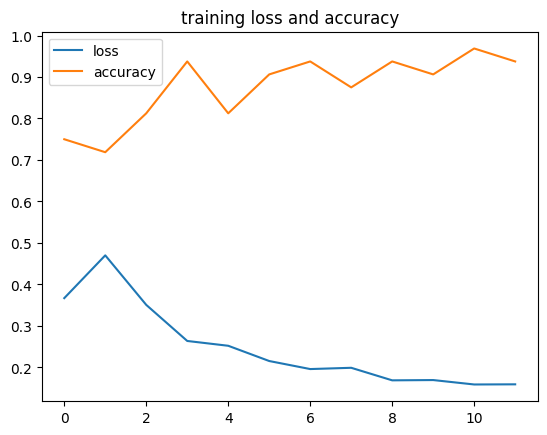

Error mat1 and mat2 shapes cannot be multiplied (65536x1 and 2048x1000)

 BAD NUMBEr : 10 

Error mat1 and mat2 shapes cannot be multiplied (65536x1 and 2048x1000)

 BAD NUMBEr : 11 

Error mat1 and mat2 shapes cannot be multiplied (65536x1 and 2048x1000)

 BAD NUMBEr : 12 

Error mat1 and mat2 shapes cannot be multiplied (65536x1 and 2048x1000)

 BAD NUMBEr : 13 

Error mat1 and mat2 shapes cannot be multiplied (65536x1 and 2048x1000)

 BAD NUMBEr : 14 

Error mat1 and mat2 shapes cannot be multiplied (65536x1 and 2048x1000)

 BAD NUMBEr : 15 

Error mat1 and mat2 shapes cannot be multiplied (65536x1 and 2048x1000)

 BAD NUMBEr : 16 

Error mat1 and mat2 shapes cannot be multiplied (65536x1 and 2048x1000)

 BAD NUMBEr : 17 

Error mat1 and mat2 shapes cannot be multiplied (65536x1 and 2048x1000)

 BAD NUMBEr : 18 

Error mat1 and mat2 shapes cannot be multiplied (65536x1 and 2048x1000)

 BAD NUMBEr : 19 

Error mat1 and mat2 shapes cannot be multiplied (65536x1 and 2048x1000)

 BAD NU

In [2]:


# transfer learning
from src.model import ResNet, CustomResNet
from tqdm.notebook import trange, tqdm
import os

device = 'cuda'
#  model = torchvision.models.densenet121(pretrained=True)
# num_ftrs = model.classifier.in_features
# model.classifier = nn.Sequential(
#    nn.Linear(num_ftrs, 500),
#    nn.Linear(500, 2)
#)
# model = torchvision.models.resnet50(pretrained=True)
    
# num_ftrs = model.fc.in_features
# n_classes = 2
# model.fc = nn.Linear(num_ftrs, n_classes)
# model.to(device)


epochs = 3
itr = 1
p_itr = 200

avoid = []

deepeness_to_experiment = list(range(3, 1000))
for deep in tqdm(deepeness_to_experiment, desc='deepeness'):
    try:
        total_loss = 0
        loss_list = []
        acc_list = []


        model = CustomResNet(deep, device=device).to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.002, amsgrad=True)
        scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[500,1000,1500], gamma=0.5)
        model.train()

        for epoch in trange(epochs, desc='Epoch'):
            for samples, labels in dataloader:
                samples, labels = samples.to(device), labels.to(device)
                optimizer.zero_grad()
                # print(f"\n\nActual INPUT Samples shape : {samples.shape}")
                output = model(samples)
                loss = criterion(output, labels)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
                scheduler.step()
                
                if itr%p_itr == 0:
                    pred = torch.argmax(output, dim=1)
                    correct = pred.eq(labels)
                    acc = torch.mean(correct.float())
                    print('[Epoch {}/{}] Iteration {} -> Train Loss: {:.4f}, Accuracy: {:.3f}'.format(epoch+1, epochs, itr, total_loss/p_itr, acc))
                    loss_list.append(total_loss/p_itr)
                    acc_list.append(acc)
                    total_loss = 0
                    
                itr += 1

        
        #  create directory cheeckpoints if does not exist
        if not os.path.exists('checkpoints'):
            os.mkdir('checkpoints')
        filename_pth = os.path.join('checkpoints', f'resnet50_{deep}.pth')
        print(f"model {model}")
        model.save_checkpoints(filename_pth)

        try:
            acc_list = [i.cpu().numpy() for i in acc_list]
        except Exception as e:
            try:
                acc_list = acc_list
            except Exception as e2:
                acc_list = acc_list.cpu().numpy()
        plt.plot(loss_list, label='loss')
        plt.plot(acc_list, label='accuracy')
        plt.legend()
        plt.title('training loss and accuracy')
        plt.show()
    except RuntimeError as re:
        print(f"Error {re}")
        avoid.append(deep)
        print(f"\n BAD NUMBEr : {deep} \n")

In [3]:
print(f"avoided numbers : {avoid}")

avoided numbers : [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 2